# Ciencia dos Dados - Projeto 1 - Lucas Mellis

## Introdução:

### Pergunta Analisada:
Será que um idh baixo faz com que um país possua alta inflação e muitas pessoas desempregadas

In [105]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
#lendo os arquivos
idh = pd.read_excel("hdi_human_development_index.xlsx")
inflacao = pd.read_excel("inflation_annual_percent.xlsx")
emprego = pd.read_excel("emprego.xls")

In [107]:
#selecionando somente o ano de 2008
lista = ['geo',2008]
idh2008 = idh.loc[:,lista]
inflacao2008 = inflacao.loc[:,['geo',2008]]
emprego2008 = emprego.loc[:,['geo','2008']]
inflacao2008.head()

,geo,2008
0,Afghanistan,2.18
1,Albania,7.63
2,Algeria,15.40
3,Andorra,1.98
4,Angola,19.70


In [108]:
#indexando as variaveis pela coluna "geo" referente aos paises
idh_idx = idh2008.set_index('geo')
emprego_idx = emprego2008.set_index('geo')
inflacao_idx = inflacao2008.set_index('geo')
emprego_idx.head()

,2008
geo,
Aruba,NaN
Afghanistan,47.433998
Angola,66.446999
Albania,47.870998
Andorra,NaN


In [109]:
#juntando idh de 2008 com a taxa anual da inflação do mesmo ano
df = idh_idx.join(inflacao_idx, how='inner',lsuffix=' idh',rsuffix=" % anual inflação")
df.head()

,2008 idh,2008 % anual inflação
geo,,
Afghanistan,0.434,2.18
Albania,0.721,7.63
Algeria,0.705,15.40
Andorra,NaN,1.98
Angola,0.480,19.70


In [110]:
#juntando a % de pessoas empregadas com a tabela acima
data = df.join(emprego_idx,how="inner")
data.columns = ["idh","% anual inflacao 2008","% pessoas empregadas 2008"]
data.dropna(axis=0,how='any',thresh=None,inplace=True)
data.sort_values(by='idh').head()

,idh,% anual inflacao 2008,% pessoas empregadas 2008
geo,,,
Niger,0.307,7.35,77.638000
Burundi,0.336,24.00,78.644997
Chad,0.343,8.65,68.064003
Central African Republic,0.345,7.04,67.016998
Burkina Faso,0.356,7.64,69.265999


## Analise Individual da Inflação:


Primeiro quantil = 4.73
Terceiro quantil = 14.2
Intervalo interquantil = 9.469999999999999
Mediana = 8.78
Valor Maximo = 33.8
Valor Minimo = -4.58
Média = 10.335468322981367
Desvio Padrao = 7.596745723206275


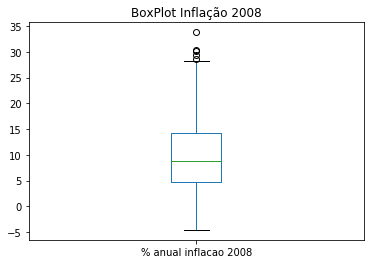

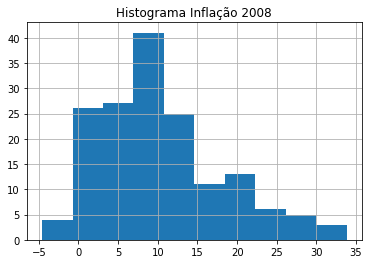

In [111]:
infla = data['% anual inflacao 2008']

quartil_1 = infla.quantile(0.25)
quartil_3 = infla.quantile(0.75)
inter_quartil = quartil_3 - quartil_1
mediana = infla.median()
media = infla.mean()
#moda = infla.mode()
valor_max = infla.max()
valor_min = infla.min()
std = infla.std()
print("Primeiro quantil = {}".format(quartil_1))
print("Terceiro quantil = {}".format(quartil_3))
print("Intervalo interquantil = {}".format(inter_quartil))
print("Mediana = {}".format (mediana))
print("Valor Maximo = {}".format(valor_max))
print("Valor Minimo = {}".format(valor_min))
print("Média = {}".format(media))
print("Desvio Padrao = {}".format(std))
#print("Moda = {}".format(moda))

infla.plot.box()
plt.title('BoxPlot Inflação 2008')
plt.show()
infla.hist()
plt.title('Histograma Inflação 2008')
plt.show()

Para fazer a analise da inflação foi calculado primeiramente alguns números, entre eles a média da inflação anual, de 10.33% e o seu desvio padrão 7.59%, número que representa uma disperssão a mais e a menos que a média, além do primeiro e do terceiro quartil, os quais são os pontos de percentil 25 e 75, e os valores obtidos foram de 4.73% e 14.2%, ou seja metade dos países levados em consideração possuem inflação entre esses resultados. A partir desses valores é possível obter a mediana, valor exato do percentil 50, a qual foi de 8.78%. Analisando em seguida o "BoxPlot", grafico utilizado para medir e ter uma ideia mais precisa do comportamento da variável, é possivel concluir que o terceiro quartil é menor que o primeiro quartil, ou seja há uma concentração maior de dados no segundo quartil, já que ele está mais achatado, além de que há alguns pontos acima, conhecidos como outliers, paises fora do Q3 (exceções), o qual possui uma valor maximo de inflação de 33.8%. Em terceiro lugar, foi plotado um histograma,..., e pode-se perceber que ele possui um leve cauda para direita, ou seja, ele é assimétrico para direita, e o número que aparece com maior frequencia é proximo de 10.

## Analise Individual da População Empregada:


Primeiro quantil = 50.7070007324219
Terceiro quantil = 65.6520004272461
Intervalo interquantil = 14.94499969482419
Mediana = 58.4309997558594
Valor Maximo = 85.4209976196289
Valor Minimo = 31.3600006103516
Desvio Padrao = 11.265244772603062
Media = 58.25024828703507


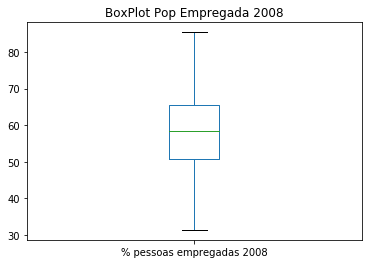

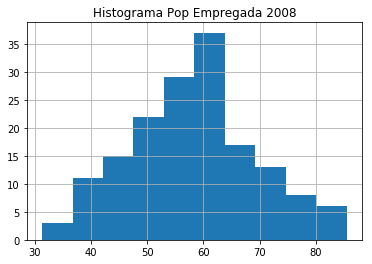

In [112]:
emp = data['% pessoas empregadas 2008']

quartil_1 = emp.quantile(0.25)
quartil_3 = emp.quantile(0.75)
inter_quartil = quartil_3 - quartil_1
mediana = emp.median()
media = emp.mean()
#moda = emp.mode()
valor_max = emp.max()
valor_min = emp.min()
std = emp.std()
print("Primeiro quantil = {}".format(quartil_1))
print("Terceiro quantil = {}".format(quartil_3))
print("Intervalo interquantil = {}".format(inter_quartil))
print("Mediana = {}".format (mediana))
print("Valor Maximo = {}".format(valor_max))
print("Valor Minimo = {}".format(valor_min))
print("Desvio Padrao = {}".format(std))
print("Media = {}".format(media))

emp.plot.box()
plt.title('BoxPlot Pop Empregada 2008')
plt.show()
emp.hist()
plt.title('Histograma Pop Empregada 2008')
plt.show()

Para a analise da população empregada foi repetido os mesmos procedimentos da inflação. Sendo assim, foi obtido como média das porcentagens de pessoas empregadas o valor de 58.25, mostrando que nos paises levados em consideração 58.25% das pessoas possuem um trabalho, com um desvio padrão de 11.25, ou seja há paises com 11.25% de pessoas a mais que a média empregadas e também paises onde há 11.25% de pessoas a menos que a média trabalhando. Outro numero calculado foram os quartis, para o primeiro foi obtido o valor de 50.70 e para o terceiro 65.65, indicando que metade dos dados estão entre esses valores, ou seja, o intervalo interquantil. Analisando o "BoxPlot" pode-se constatar que o 2Q e o 3Q possuem praticamente o mesmo tamanho, sem nenhum outlier. Olhando para o histograma e possivel observar algo muito perto de uma simetria, com o valor que aparece com maior frequencia perto de 60% da população empregada

## Analise Individual IDH

Primeiro quantil = 0.518
Terceiro quantil = 0.795
Intervalo interquantil = 0.277
Mediana = 0.703
Valor Maximo = 0.936
Valor Minimo = 0.307
Desvio Padrao = 0.16635902836899408
Media = 0.6666583850931678


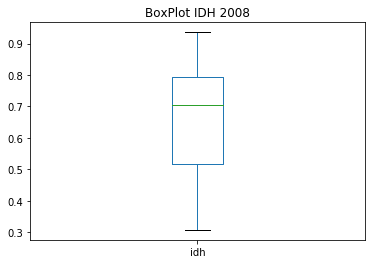

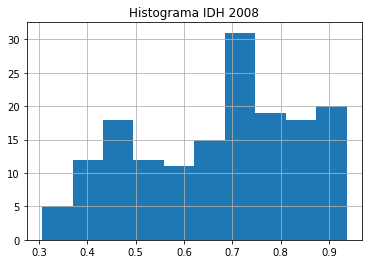

In [113]:
idh = data['idh']

quartil_1 = idh.quantile(0.25)
quartil_3 = idh.quantile(0.75)
inter_quartil = quartil_3 - quartil_1
mediana = idh.median()
media = idh.mean()
#moda = emp.mode()
valor_max = idh.max()
valor_min = idh.min()
std = idh.std()
print("Primeiro quantil = {}".format(quartil_1))
print("Terceiro quantil = {}".format(quartil_3))
print("Intervalo interquantil = {}".format(inter_quartil))
print("Mediana = {}".format (mediana))
print("Valor Maximo = {}".format(valor_max))
print("Valor Minimo = {}".format(valor_min))
print("Desvio Padrao = {}".format(std))
print("Media = {}".format(media))

idh.plot.box()
plt.title('BoxPlot IDH 2008')
plt.show()
idh.hist()
plt.title('Histograma IDH 2008')
plt.show()

Para a análise do IDH foi seguido os mesmos passos das variáveis acima. Dessa forma, foi possível calcular que o IDH médio dos países estudados é de 0.66, considerado um IDH mediano, com um desvio padrão de 0.16, ou seja, existem também países que apresentam um  IDH próximo de 0.82 e 0.5, já que o desvio padrão mostra a dispersão dos valores em relação a média. Em relação ao primeiro e ao terceiro quartil foram obtidos os valores de 0.51 e 0.79 respectivamente, revelando que metade dos países possuem um IDH não muito bom entre esses valores. Olhando para o "BoxPlot" pode-se averiguar que o primeiro e o segundo quartil são maiores que o terceiro quartil, fato que mostra que a maior parte dos IDH's são menores que 0.70, com um valor máximo e mínimo de 0.93 e 0.30, respectivamente. Refletindo sobre o histograma é possivel constatar que ele é assimétrico a esquerda com um valor de maior frequencia perto de 0.7.

## Analise da Relação entre Inflação e IDH:

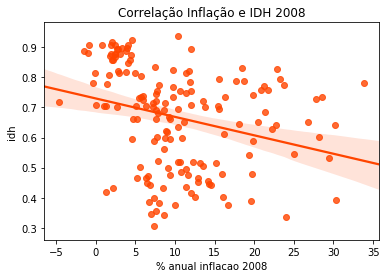

Coeficiente de Correlação = -0.2797596114953868


In [114]:
sns.regplot(data["% anual inflacao 2008"],data['idh'],color = 'orangered')
plt.title('Correlação Inflação e IDH 2008')
plt.show()
coef_cor = infla.corr(idh)
print("Coeficiente de Correlação = {}".format(coef_cor))

Após plotar e estudar o grafico de "scatter", o qual mostra a correlação entre duas variaveis, pode-se inferir que não existe a menso relação entre inflação e idh, uma vez que o seu coeficiente de correlação é de -0.279, caso eles fosse bem relacionados esse número deveria estar perto de 1 ou -1, porém quanto mais perto de 0 mais disperso são os os valores obtidos. 

## Analise da Relação entre % de Pessoas Empregadas e IDH:

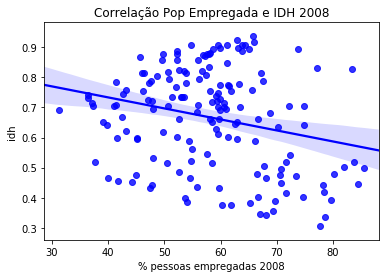

Coeficiente de Correlação = -0.24803130482488853


In [115]:
sns.regplot(data["% pessoas empregadas 2008"],data['idh'],color = 'blue')
plt.title('Correlação Pop Empregada e IDH 2008')
plt.show()
coef_cor2 = emp.corr(idh)
print("Coeficiente de Correlação = {}".format(coef_cor2))

Após analisar o gráfico de correlação entre % de pessoas empregadas e IDH é possível observar que eles nao se correlacionam, posto que os dados estão muito espalhados em torno do gráfico, ou seja, eles possuem um coeficiente de correlação muito perto de 0, no caso, -0.24,

## Analise da Relação entre % de Pessoas Empregadas e % Anual de Inflação:

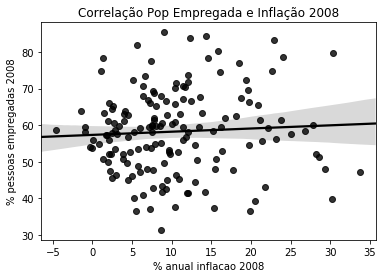

Coeficiente de Correlação = 0.058811471995666054


In [116]:
sns.regplot(data["% anual inflacao 2008"],data['% pessoas empregadas 2008'],color = 'black')
plt.title('Correlação Pop Empregada e Inflação 2008')
plt.show()
coef_cor = emp.corr(infla)
print("Coeficiente de Correlação = {}".format(coef_cor))

Como pode-se perceber também, não existe nenhuma correlação entre a % de pessoas empregadas e a % anual inflação. Esse fato acontece pois os pontos estão muito dispersos no gráfico e apresentam um coeficiente de correlação de -0.05, ou seja, essas variaveis realmente não tem algo em comum.

## Conclusão:

Após a análise completa de todas as variáveis sozinhas e correlacionadas, pode-se afirmar que no ano de 2008 o idh não influencia nenhum pouco na % da inflação de um pais e nem na % de pessoas empregadas. Sendo assim é impossível dizer, por exemplo, que quanto menor a inflação maior o idh, ou ainda, quanto maior a porcentagem de pessoas maior o idh e muito menos o contrário. É de se esperar que paise desenvolvidos com alto idh possuam uma inflação controlada e uma alta quantidade de pessoas com um trabalho, porém como é visivel nos graficos elas não tem a menor correlação, então não see pode afirmar absolutamente nada. Portanto, respondendo a pergunta, um idh baixo não necessáriamente indica um país com péssima economia e inflação alta e nem com muitas pessoas desempregadas. Mas será que esse comportamento permanece para os outros anos ?

## Comparando ao Longo do Tempo:

In [120]:
idh2 = pd.read_excel("hdi_human_development_index.xlsx")
inflacao2 = pd.read_excel("inflation_annual_percent.xlsx")
emprego2 = pd.read_excel("emprego.xls")

lista = ['geo',2010]
idh2010 = idh2.loc[:,lista]
inflacao2010 = inflacao2.loc[:,['geo',2010]]
emprego2010 = emprego2.loc[:,['geo','2010']]

idh_idx2 = idh2010.set_index('geo')
emprego_idx2 = emprego2010.set_index('geo')
inflacao_idx2 = inflacao2010.set_index('geo')

df2 = idh_idx2.join(inflacao_idx2, how='inner',lsuffix=' idh 2010',rsuffix=" % anual inflação ")
data2 = df2.join(emprego_idx,how="inner")
data2.columns = ["idh","% anual inflacao 2010","% pessoas empregadas 2010"]
data2.dropna(axis=0,how='any',thresh=None,inplace=True)
#data2.sort_values(by='idh').head()

idh = pd.read_excel("hdi_human_development_index.xlsx")
inflacao = pd.read_excel("inflation_annual_percent.xlsx")
emprego = pd.read_excel("emprego.xls")

lista = ['geo',2012]
idh2012 = idh.loc[:,lista]
inflacao2012 = inflacao.loc[:,['geo',2012]]
emprego2012 = emprego.loc[:,['geo','2012']]

idh_idx3 = idh2012.set_index('geo')
emprego_idx3 = emprego2012.set_index('geo')
inflacao_idx3 = inflacao2012.set_index('geo')

df3 = idh_idx3.join(inflacao_idx3, how='inner',lsuffix=' idh',rsuffix=" % anual inflação ")
data3 = df3.join(emprego_idx,how="inner")
data3.columns = ["idh","% anual inflacao 2012","% pessoas empregadas 2012"]
data3.dropna(axis=0,how='any',thresh=None,inplace=True)
################################################################################################################################
idh10 = pd.read_excel("hdi_human_development_index.xlsx")
inflacao10 = pd.read_excel("inflation_annual_percent.xlsx")
emprego10 = pd.read_excel("emprego.xls")

lista = ['geo',2006]
idh2006 = idh10.loc[:,lista]
inflacao2006 = inflacao10.loc[:,['geo',2006]]
emprego2006 = emprego10.loc[:,['geo','2006']]

idh_idx4 = idh2006.set_index('geo')
emprego_idx4 = emprego2006.set_index('geo')
inflacao_idx4 = inflacao2006.set_index('geo')

df4 = idh_idx4.join(inflacao_idx4, how='inner',lsuffix=' idh',rsuffix=" % anual inflação ")
data4 = df4.join(emprego_idx4,how="inner")
data4.columns = ["idh","% anual inflacao 2006","% pessoas empregadas 2006"]
data4.dropna(axis=0,how='any',thresh=None,inplace=True)

### Analisando a pop empregada de 2010 e 2012:

Coeficiente de Correlação 2008 = -0.24803130482488853
Coeficiente de Correlação 2010 = -0.2485075083234259
Coeficiente de Correlação 2012 = -0.23411127865224307


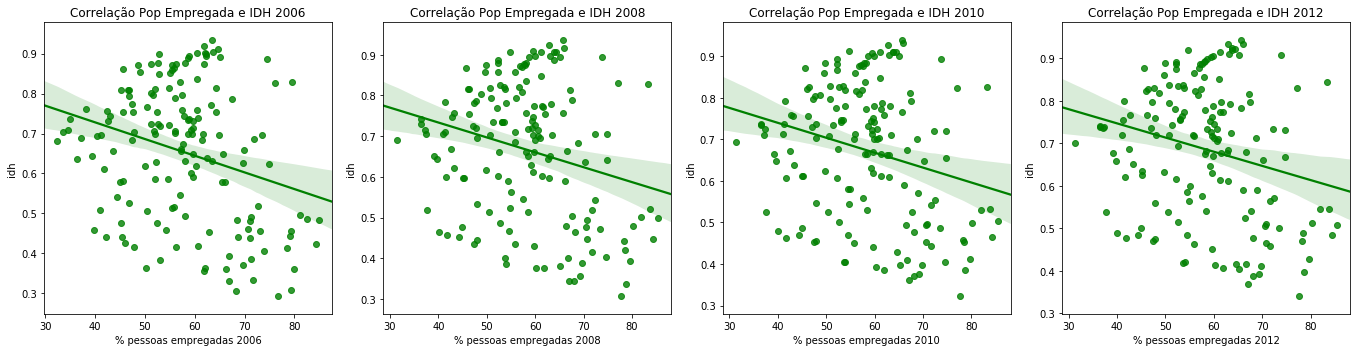

In [124]:
emp = data['% pessoas empregadas 2008']
emp2 = data2['% pessoas empregadas 2010']
emp3 = data3['% pessoas empregadas 2012']
emp4 = data4['% pessoas empregadas 2006']
idh = data['idh']
idh2 = data2['idh']
idh3 = data3['idh']
idh4 = data4['idh']

fig4 = plt.figure(figsize=(19,5))
plt.subplot(141)
plt.title("Correlação Pop Empregada e IDH 2006")
plot = sns.regplot(data4["% pessoas empregadas 2006"],data4['idh'],color = 'green')
plt.subplot(142)
plt.title("Correlação Pop Empregada e IDH 2008")
plot = sns.regplot(data["% pessoas empregadas 2008"],data['idh'],color = 'green')
plt.subplot(143)
plt.title("Correlação Pop Empregada e IDH 2010")
plot = sns.regplot(data2["% pessoas empregadas 2010"],data2['idh'],color = 'green')
plt.subplot(144)
plt.title("Correlação Pop Empregada e IDH 2012")
plot = sns.regplot(data3["% pessoas empregadas 2012"],data3['idh'],color = 'green')
coef_cor4 = emp3.corr(idh3)
coef_cor5 = emp2.corr(idh2)
coef_cor6 = emp.corr(idh)
print("Coeficiente de Correlação 2008 = {}".format(coef_cor6))
print("Coeficiente de Correlação 2010 = {}".format(coef_cor5))
print("Coeficiente de Correlação 2012 = {}".format(coef_cor4))
plt.tight_layout()
plt.show()

### Analisando a Inflação de 2006, 2010 e 2012:

Coeficiente de Correlação 2008 = -0.2797596114953868
Coeficiente de Correlação 2010 = -0.2554613717295477
Coeficiente de Correlação 2012 = -0.22601383197300623


,idh,% anual inflacao 2012,% pessoas empregadas 2012
geo,,,
Belarus,0.796,75.2,61.556000
Ethiopia,0.427,33.5,79.667000
Sudan,0.478,34.9,41.806999


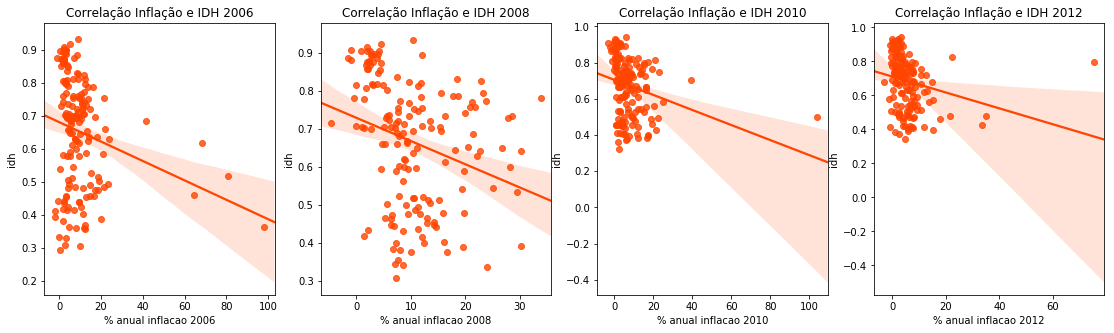

In [141]:
infla2 = data2['% anual inflacao 2010']
infla3 = data3['% anual inflacao 2012']
infla4 = data4['% anual inflacao 2006']
fig4 = plt.figure(figsize=(19,5))

plt.subplot(141)
plt.title('Correlação Inflação e IDH 2006')
plot = sns.regplot(data4["% anual inflacao 2006"],data4['idh'],color = 'orangered')
plt.subplot(142)
plt.title('Correlação Inflação e IDH 2008')
plot = sns.regplot(data["% anual inflacao 2008"],data['idh'],color = 'orangered')
plt.subplot(143)
plt.title('Correlação Inflação e IDH 2010')
plot = sns.regplot(data2["% anual inflacao 2010"],data2['idh'],color = 'orangered')
plt.subplot(144)
plt.title('Correlação Inflação e IDH 2012')
plot = sns.regplot(data3["% anual inflacao 2012"],data3['idh'],color = 'orangered')
coef_cor4 = infla.corr(idh)
print("Coeficiente de Correlação 2008 = {}".format(coef_cor4))
coef_cor = infla2.corr(idh2)
print("Coeficiente de Correlação 2010 = {}".format(coef_cor))
coef_cor = infla3.corr(idh3)
print("Coeficiente de Correlação 2012 = {}".format(coef_cor))

#pais_quebrado = data[(data['% anual inflacao 2008'] > 30)]
#pais_quebrado
#pais_quebrado2 = data2[(data2['% anual inflacao 2010'] > 30)]
#pais_quebrado2
pais_quebrado3 = data3[(data3['% anual inflacao 2012'] > 30)]
pais_quebrado3
#pais_quebrado4 = data4[(data4['% anual inflacao 2006'] > 30)]
#pais_quebrado4


### Conclusão da Análise Temporal:

Depois de comparar as variáveis com o idh nos de 2008, ano escolhido para análise individual, 2006, 2010 e 2012 pode-se observar que o comportamento obtido anteriormnete para o ano de 2008 se repete para % da população empregada nos três outros anos escolhidos, com pequenas variações. No que se diz respeito a inflação é possível observar nos gráficos de correlação que nos anos de 2006, 2010 e 2012 alguns países tiveram sua economia abalada e tiveram uma inflação maior que 40%, no caso, Guiné e Gana em 2006, Etiópia e Iraque em 2008, Mongólia e Nigéria em 2010 e em 2012 Bielorússia e Etiópia novamente. Sendo assim, pode-se tirar como conlusão que idh, inflação e pessoas empregadas não tem a menor correlação e não se influenciam, dessa forma não se pode dizer que um país com idh alto possui baixa inflação e muitas pessoas empregadas, fato esse que é de se esperar previamente antes de analisar os dados. Ou por exemplo o contrário, um país com baixo idh não tem inflação alta e muitas pessoas desempregadas. Portanto, resposta da pergunta depois de uma análise temporal continua a mesma.